## PCA and Text Analysis

This assignment involves processing real e-mails, some of which are scams. Some of these scam e-mails have some offensive content. I don't think anything is worse than R-rated, but I just want to warn you that if you start reading the e-mail text, you might read something offensive. If that's a problem, feel free to e-mail me and we can talk about it more or you can skip the assignment.  

### Q1. 

Open the `Phishing_Email.parquet` data. It is available at `https://data434.s3.us-east-2.amazonaws.com/Phishing_Email.parquet`, and you can download it directly using Pandas by providing that URL: `df = pd.read_parquet('https://data434.s3.us-east-2.amazonaws.com/Phishing_Email.parquet')`.

We just want to look at the first step of cleaning text data, so you can get an idea of how it works. The `Email Text` variable contains the actual text of the email and the `Email Type` takes the value `Phishing Email` or `Safe Email`. We want to predict which emails are phishing emails from their contents. 

Use the `str.split()` method to break the `Phishing Email` values into **tokens**: The individual words or symbols that create text data like emails. Natural Language Processing is primarily about analyzing the frequency and co-occurrence of tokens. Print the results of your split and examine it.

In words, how would you clean the tokens and use them to predict whether the email is a phishing scam or not? A short summary of the kinds of tasks you would do and how you would run a predictive algorithm is fine.

In [8]:
import pandas as pd
import pickle

In [4]:
df = pd.read_parquet('https://data434.s3.us-east-2.amazonaws.com/Phishing_Email.parquet')

In [5]:
df

,index,Unnamed: 0,Email Text,Email Type
0,0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,4,software at incredibly low prices ( 86 % lower...,Phishing Email
...,...,...,...,...
18629,18645,18646,date a lonely housewife always wanted to date ...,Phishing Email
18630,18646,18647,request submitted : access request for anita ....,Safe Email
18631,18647,18648,"re : important - prc mtg hi dorn & john , as y...",Safe Email
18632,18648,18649,press clippings - letter on californian utilit...,Safe Email


In [6]:
tokens = df['Email Text'].str.split()
tokens.head()

0    [re, :, 6, ., 1100, ,, disc, :, uniformitarian...
1    [the, other, side, of, *, galicismos, *, *, ga...
2    [re, :, equistar, deal, tickets, are, you, sti...
3    [Hello, I, am, your, hot, lil, horny, toy., I,...
4    [software, at, incredibly, low, prices, (, 86,...
Name: Email Text, dtype: object

I would clean the data by making all of the words lowercase (if they contain letters) so that tokens like "free" and "Free" would show up in the same counts. I would then make a frequency list to track what words were most used in the emails. Since the data are labeled, I would then go through and determine which words are most frequent in phishing emails that are not as frequent in safe emails. This would prevent words like "a" or "the" from being associated with phishing emails. I would not give much weight to words that were used infrequently, because there is not enough data to determine if those words are a good indicator of phishing. 

### Q2. 

I aggregated all the emails into a single vector, and removed the punctuation and very common words (e.g. "the"). Run the below code chunk to open it, and use the Counter class to look at the most common words:

In [9]:
with open('all_tokens.pickle', 'rb') as file:
    all_tokens = pickle.load(file)
    
from collections import Counter
token_count = Counter(all_tokens)
token_freq = token_count.most_common()

<Axes: >

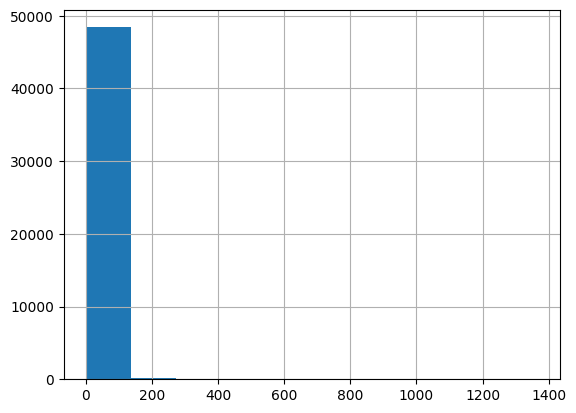

In [12]:
token_df = pd.DataFrame(token_freq, columns=['word', 'count'])
token_df['count'].hist()

Plot a histogram of the occurrences of tokens. What do you notice about the frequency of occurrence of different tokens? How does it look?

The vast majority of words have a frequency of less than 200. the graph is skewed right with very few data points on the high end. 

### Q3. 

Load `Phishing_clean.parquet`. This is the text from the e-mails broken into the most common 2,711 tokens and one-hot-encoded as features/covariates. So each row is an e-mail, the `Email Type` takes the value 1 if it's a scam and 0 otherwise, and every other column is a word or symbol that occurs in at least 15 e-mails.

1. Perform an 80/20 train-test split of the data.
2. Run a regression of $y$ on the one-hot-encoded emails. What is the $R^2$ on the test set? On the training set?
3. What words have the largest coefficients in absolute value and most strongly influence predictions? 

In [15]:
clean = pd.read_parquet('Phishing_clean.parquet')
clean.head()

,Email Type,new,date,get,please,enron,like,2002,would,one,...,ï¿½ï¿½,safety,yap,ypil,maintain,procedures,tip,elizabeth,leadership,italian
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
from sklearn.model_selection import train_test_split

In [25]:
y = clean['Email Type']
X = clean.drop('Email Type', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=125)

In [19]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


In [26]:
model = LinearRegression(fit_intercept=False)

model.fit(X_train, y_train)

y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)
print('r2 train: ', r2_score(y_pred_train,y_train) )
print('r2 test: ', r2_score(y_pred_test,y_test) )    

train:  0.620218496312682
test:  -0.00026838432720155403


In [27]:
coef_df = pd.DataFrame({'variable':model.feature_names_in_ , 'value':model.coef_})
coef_df['abs'] = np.abs(coef_df['value'])
coef_df.sort_values('abs',ascending=False)

,variable,value,abs
72,1998,-1.719764e+13,1.719764e+13
33,2001,-1.478868e+13,1.478868e+13
470,2004,1.204847e+13,1.204847e+13
6,2002,8.974490e+12,8.974490e+12
1380,wysak,8.492733e+12,8.492733e+12
...,...,...,...
2492,"05,",-6.529342e-05,6.529342e-05
2454,750,5.975903e-05,5.975903e-05
634,translation,-3.051758e-05,3.051758e-05
2558,"09,",-8.153746e-07,8.153746e-07


The tokens with the highest frequencies are numbers. 

### Q4. 

Take the matrix of one-hot-encoded tokens (the data, less the outcome variable, `Email Type`) and perform a principal components analysis decomposition with two components. Plot the first two principal components in a scatter plot, and hue the points by whether they are a phishing scam or not. Do you notice any patterns?

In [29]:
import seaborn as sns
from sklearn.decomposition import PCA

<Axes: >

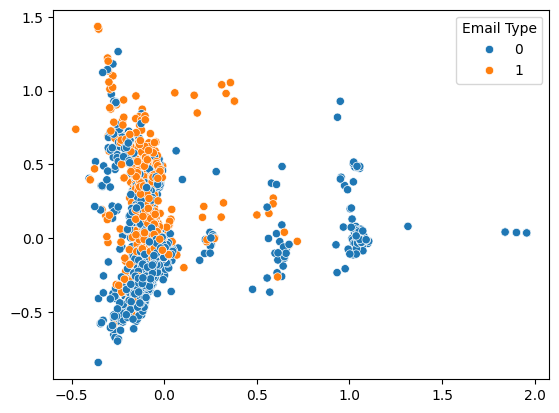

In [30]:
pca = PCA(n_components=2).fit(X_train)

Z_test = pca.transform(X_test)
Z_train = pca.transform(X_train)

sns.scatterplot(x=Z_test[:,0],y=Z_test[:,1],hue=y_test)

### Q5.

Run a linear regression of $y$ on the first 2,610 principal components of $X$. What is the $R^2$ on the training and test sets? (I used cross validation to determine that 2,610 was approximately optimal, but not all 2,711 components.)

How does this performance compare to the linear regression?

### Q6.

Explain briefly in your own words what the advantage is in using the principal components to run this high-dimensional regression, rather than the original data.